# Clustering con sklearn

#### Contenidos:
* [Instalar bibliotecas](#Instalar-bibliotecas)
* [Usando sklearn](#Usando-sklearn)
* [Datos de ejemplo](#Datos-de-ejemplo)
* [Sklearn KMeans](#Sklearn-KMeans)
* [Determinando el valor de k](#Determinando-el-valor-de-k)
* [Medidas](#Medidas)
* [Otros algoritmos basados en particionamiento](#Otros-algoritmos-basados-en-particionamiento)
    * [PAM](#PAM)
    * [GMMs](#GMMs)    

## Instalar bibliotecas

Vamos a hacer uso de distintas bibliotecas en este notebook. Si no las has instalado en tu entorno de Python antes, lo puedes hacer ejecutando las siguientes instrucciones:

In [ ]:
!pip install sklearn

In [ ]:
!pip install numpy

In [ ]:
!pip install matplotlib

In [ ]:
!pip install pandas

In [ ]:
!pip install sns

Una vez instaladas, ya podemos importarlas:

In [1]:
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

## Usando sklearn

La biblioteca [scikit-learn library](https://scikit-learn.org/stable/modules/clustering.html) es una de la herramientas más populares en Python. Es una biblioteca de machine learning que contiene una amplia variedad de algoritmo, incluyendo algoritmos clásicos de clustering (como el k-means) y algoritmos relativamente avanzados (como clustering jerárquico, o DBSCAN).

Cada algoritmo de clustering viene en dos variantes: una clase, que implementa el método de ajuste para aprender los clusters sobre los datos de entrenamiento, y una función, que, dados los datos de entrenamiento, devuelve un array de etiquetas enteras correspondientes a los diferentes clusters. Para la clase, las etiquetas sobre los datos de entrenamiento se pueden encontrar en el atributo `labels_`.

## Datos de ejemplo

Una cosa importante a tener en cuenta es que los algoritmos implementados en este módulo pueden tomar diferentes tipos de datos como entrada. Todos los métodos aceptan matrices de datos estándar de forma (n_muestras, n_características). En nuestro caso, vamos a usar Pandas DataFrames.

Usemos pandas para leer el fichero csv:

In [2]:
df = pd.read_csv('data/iris.csv')

In [3]:
df.shape

(150, 5)

In [4]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

In [5]:
df = df.drop(columns=['class']) # for iris dataset

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


En el notebook anterior, normalizamos los datos para usar el k-means. Sklearn ofrece numerosas funciones para realizar esta oepración. En particular podemos usar el [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler) para hacer el mismo trabajo que hicimos anteriormente y llevarnos todas las características al rango [0,1].

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()

In [9]:
scaler.fit(df)

MinMaxScaler()

In [10]:
results_norm = scaler.transform(df)

In [11]:
type(results_norm)

numpy.ndarray

In [12]:
df_norm = pd.DataFrame(results_norm, index=df.index, columns=df.columns)

In [13]:
df_norm.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


Igual que hicimos anteriormente, usaremos una función para mostrar el los datos y los clusters encontrados. Podrás encontrar una sutil diferencia con la función anterior, y es que sklearn suelen devolver numpy arrays en lugar de DataFrames. 

In [15]:
def mostrar(X, c=None, centroids=None,i=0,j=0):

    # Creamos los mapas de colores a utilizar
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#FFFF00', '#0000FF'])

    # Creamos la figura
    plt.figure(figsize=(10,8))

    # Pintamos los puntos
    plt.scatter(X.iloc[:, i], X.iloc[:, j], c=c, cmap=cmap_bold, s=60)

    # Pintamos los centroides si los hay 
    # ligero cambios con respecto a la función del notebook anterior
    if centroids is not None:
        plt.scatter(centroids[:,i], centroids[:,j], marker='*', c=range(centroids.shape[0]), s=500)

    # Mostramos la figura
    plt.show()

Cuando combinamos preprocesamiento con algoritmos de aprendizaje (p.ej. con clustering, o con un algoritmo de clasificación), podría ser útil [Pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html), pero lo dejamos para que el estudiante lo investigue.

## Sklearn KMeans

En la librería sklearn.cluster está implementado el método [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans). Los parámetros más usados que podemos seleccionar son:
* n_clusters = número de clusters a encontrar (por defecto 8)
* init=  'random' o  'k-means++'. Indica la forma de inicializar los centroides. De manera aleatoria o de una forma más "inteligente" para acelerar la convergencia del algoritmo 
* n_init = número de veces que se ejecuta k-means. Se devuelve la mejor solución de todas
* max_iter = número máximo de iteraciones
* tol = tolerancia por la cual se fija la convergencia
* random_state = para hacer reproducible el experimento

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=12345).fit(df_norm)
centros=kmeans.cluster_centers_
etiquetas=kmeans.labels_

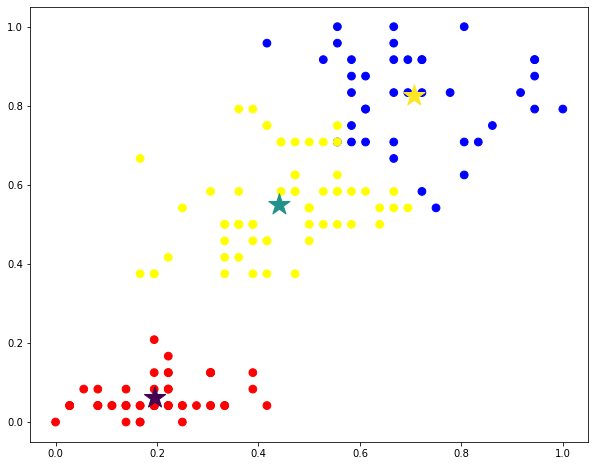

In [17]:
mostrar(df_norm, etiquetas, centros, i=0,j=3)

## Determinando el valor de `k`

En general, k-means es un algoritmo sencillo que es capaz de detectar clusters esféricos. Uno de los principales inconvenientes frente a otro tipo de algoritmos de *clustering* es que necesita que le indiquemos el número de *clusters* a detectar. En muchos problemas podemos no saber cuál es el número de *clusters* ideal. 

Para determinar este número, podemos utilizar el método del codo (**elbow method**), que consiste en probar varios valores de k y analizar cómo disminuye la curva de la función a minimizar. Aquel punto en el que la pendiente de la curva ya no sea tan pronunciada es, habitualmente, el número de *clusters* idóneo para el problema.

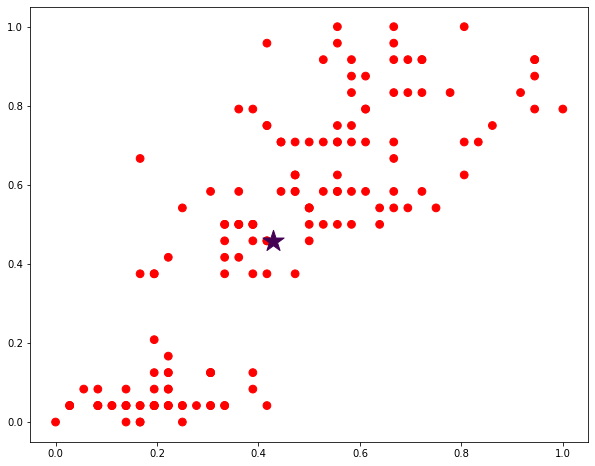

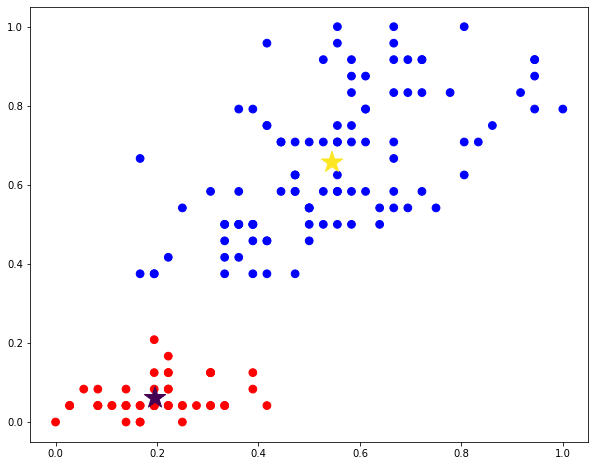

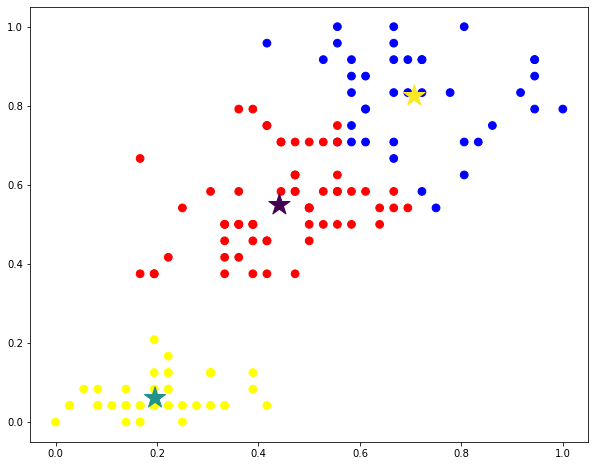

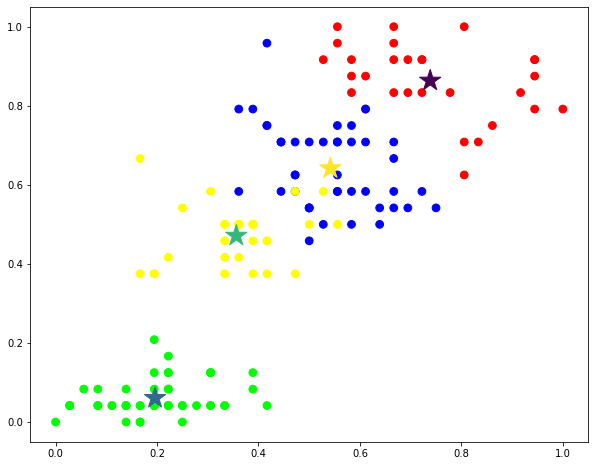

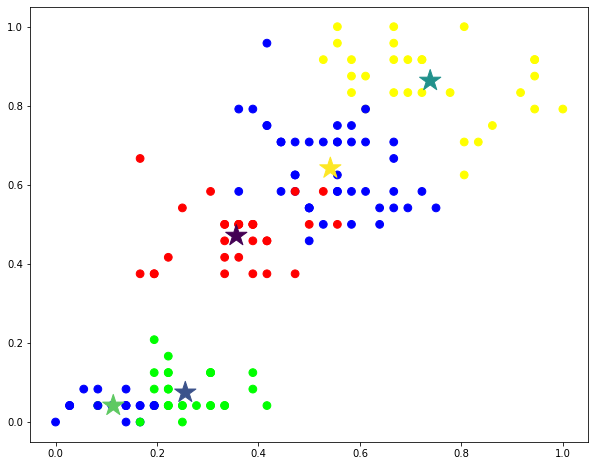

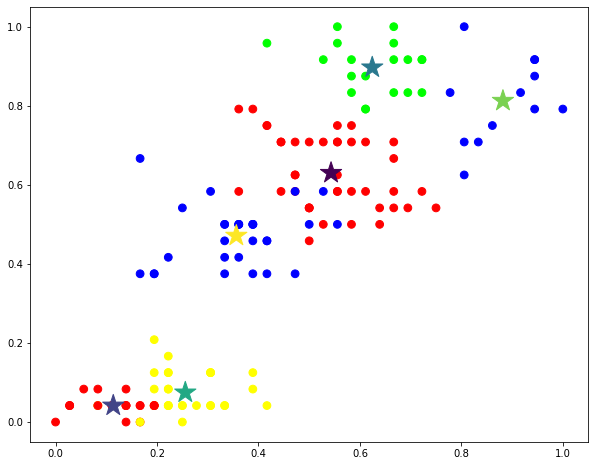

In [21]:
error = []

for k in np.arange(1,7):
    kmeans = KMeans(n_clusters=k, n_init=100).fit(df_norm)
    error.append(kmeans.inertia_)
    centros=kmeans.cluster_centers_
    etiquetas=kmeans.labels_
    
    mostrar(df_norm, etiquetas, centros, i=0,j=3)

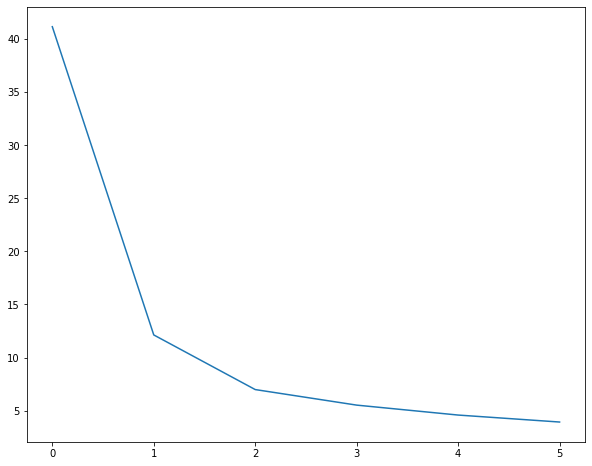

In [23]:
plt.figure(figsize=(10, 8))
plt.plot(error)
plt.show()

## Medidas de calidad

Además de intentar minimizar la función de coste, existen numerosas medidas de calidad que miden cuán buena es una agrupación. Una de las medidas más comunes para determinar el mejor número de *clusters* en un dataset son los ***silhouette coefficients***. Estos coeficientes miden la cohesión dentro de los clusters y la separación entre ellos. Para cada dato, se analizan dos puntos:
* Cuánto de cercano es ese dato al resto de datos del mismo cluster
* La distancia entre ese punto y el más cercano que perteneca a un *cluster* diferente
Mediante la función *silhouette_score* de *sklearn*, se promedia el coeficiente *silhouette* de todos los datos en un único valor. Este valor puede variar entre -1 y 1, indicando que cuanto mayor es el número, mejor es el agrupamiento de los datos. 

Podemos calcular este valor para la ejecución del algoritmo k-means con diferentes valores de k y elegir como número óptimo de *clusters* aquel cuya solución obtenga un mayor valor de *silhouette coefficients*.

In [25]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

#Para los sihouette coefficients es necesario tener al menos 2 clusters
for k in np.arange(2,7):
    kmeans = KMeans(n_clusters=k, n_init=115).fit(df_norm)
    score = silhouette_score(df_norm, kmeans.labels_)
    silhouette_coefficients.append(score)

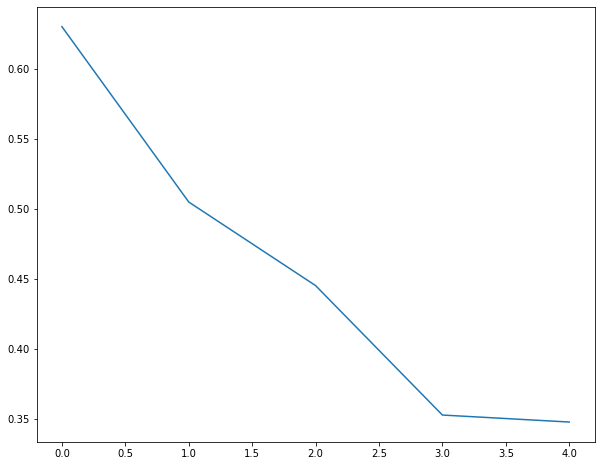

In [26]:
plt.figure(figsize=(10, 8))
plt.plot(silhouette_coefficients)
plt.show()

Existen muchas más métricas de calidad de clustering en sklearn. Te recomiendo que les eches un ojo.

```
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.metrics.cluster import calinski_harabasz_score
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics.cluster import silhouette_score
from sklearn.metrics.cluster import v_measure_score
```

En este notebook, hemos visto la implementación del método del codo, pero podríamos intentar una validación cruzada para determinar el valor de `k`.

## Otros algoritmos basados en particionamiento

### PAM

El algoritmo de los k-medoids no está disponible en la sklearn directamente, pero si en un versión diferente llamada [sklearn_extra](https://scikit-learn-extra.readthedocs.io/en/stable/generated/sklearn_extra.cluster.KMedoids.html).

In [43]:
!pip install scikit-learn-extra

     |████████████████████████████████| 382 kB 3.4 MB/s eta 0:00:01


In [44]:
from sklearn_extra.cluster import KMedoids

In [45]:
kmedoids = KMedoids(n_clusters=3, random_state=12345).fit(df_norm)
centros=kmedoids.cluster_centers_
etiquetas=kmedoids.labels_

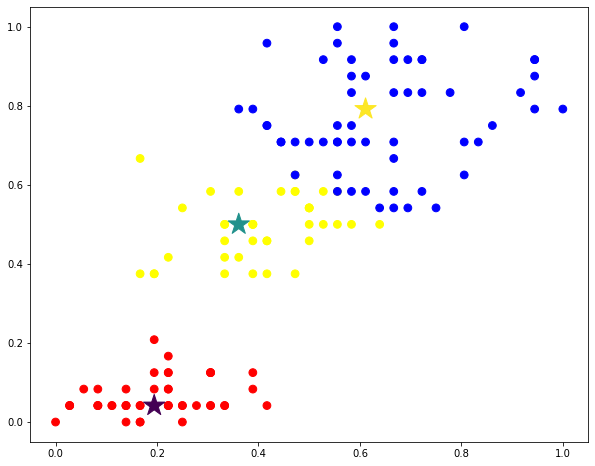

In [46]:
mostrar(df_norm, etiquetas, centros, i=0,j=3)

### Gaussian Mixture Models 

Al analizar el algoritmo k-means hemos visto que es capaz de detectar correctamente *clusters* con forma de hiper-elipse. Analizándolo en dos dimensiones, podemos pensar que el algoritmo k-means trata de crear un círculo alrededor de cada centroide, con el radio suficiente para que todos los datos de ese *cluster* queden dentro del círculo. Esta aproximación puede no ser capaz de detectar los grupos existentes en los datos, si su forma no se ajusta a una elipse.

Gaussian Mixture Models es otro método que podemos utilizar para detectar los grupos de datos, en el que tenemos un mayor grado de libertad. En este caso, el algoritmo trata de determinar las distribuciones gaussianas multidimensionales que mejor se ajustan a los datos. De esta manera, cada *cluster* está formado por una superposición de distribuciones gaussianas. Esto permite que los *clusters* tengan otro tipo de formas convexas, no solo hiper-esferas. En este sentido, podemos decir que los resultados obtenidos por Gaussian Mixtures Models pueden generalizar a los resultados obtenidos por k-means.


In [30]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, covariance_type='full').fit(df_norm)
etiquetas=gmm.predict(df_norm)


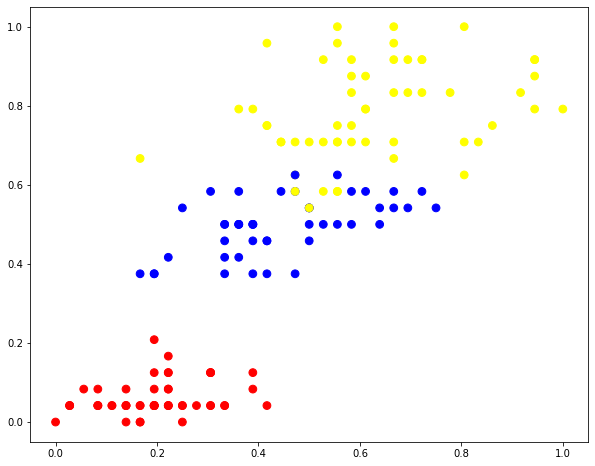

In [31]:
mostrar(df_norm, c=etiquetas, i=0,j=3)

Al estar trabajando con distribuciones gaussianas, permitimos que exista cierto solapamiento entre los clusters. De esta manera, el algoritmo trabaja con probabilidades de que cada dato pertenezca a cada cluster. Por lo tanto, podemos obtener una salida "suave" del algoritmo mostrando estas posibilidades, en lugar de tener solo las asignaciones "fuertes" de datos a clusters.

In [34]:
probabilidades=gmm.predict_proba(df_norm)
prob=np.max(np.array(probabilidades),axis=1)

Uno de los parámetros más importantes a la hora de aplicar el *Gaussian Mixture Model* es la elección de la covarianza. En *sklearn* tenemos 4 opciones a elegir:
* full: cada componente tiene su propia matriz de covarianza
* tied: todas las componentes comparten una matriz de covarianza general
* diag: cada componente tiene su propia matriz de covarianza diagonal
* spherical: cada componente tiene un valor de varianza
Cada componente gaussiano tiene una matriz de covarianza. Geométricamente, la estructura de covarianza determina la forma de un elipsoide para un clúster. Cada combinación de especificaciones determina la forma y la orientación de los elipsoides.

Aunque podríamos pensar que la opción *full*, al permitir más grados de libertad, es la mejor para adaptarse a cualquier problema, esto no siempre es cierto. Dependiendo del tamaño de nuestro dataset, esta configuración puede sobreaprender las formas de los *clusters* si no tienen muchos datos. De esta manera, nuestra solución no generalizará bien para nuevos datos.

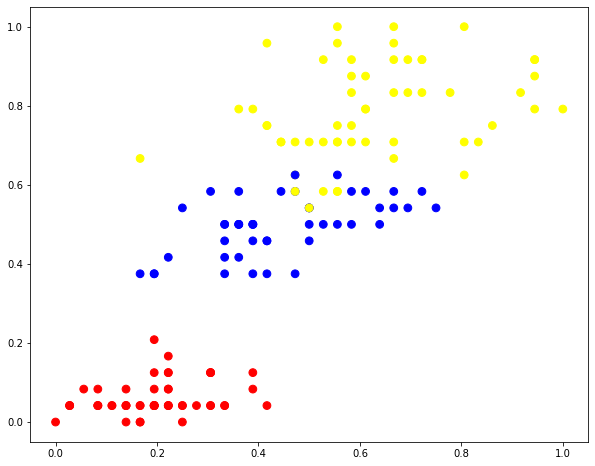

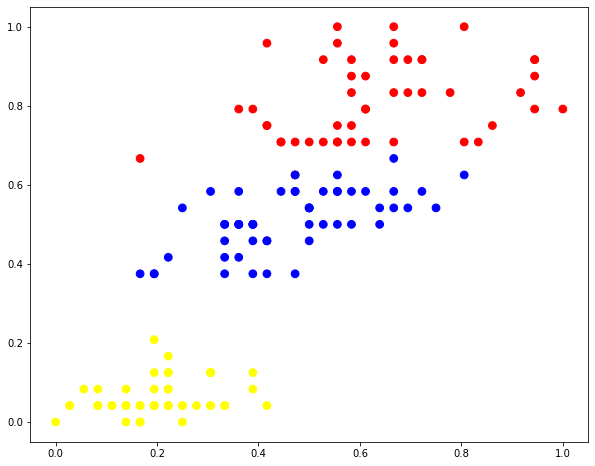

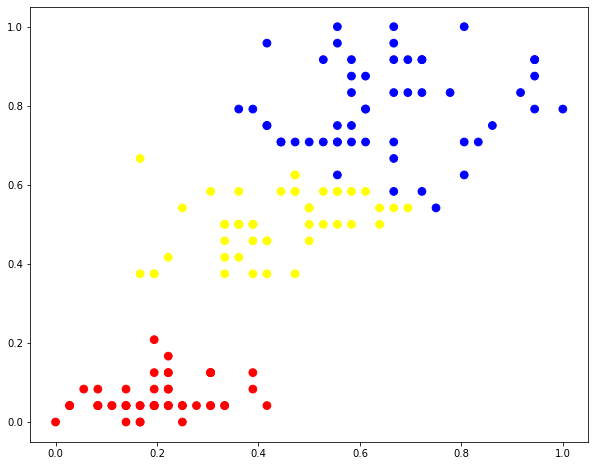

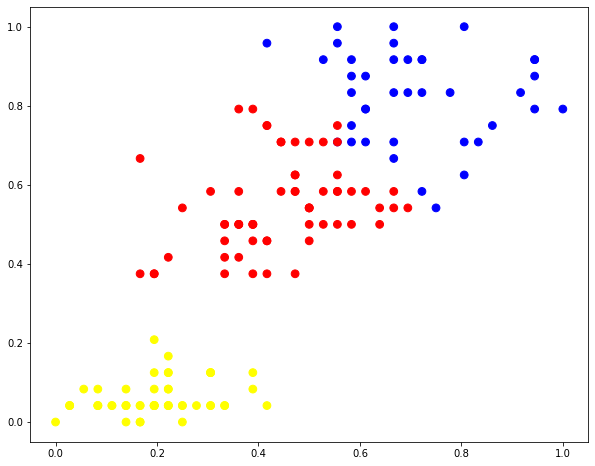

In [40]:
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(df_norm)
etiquetas=gmm.predict(df_norm)
mostrar(df_norm, c=etiquetas, i=0,j=3)
gmm = GaussianMixture(n_components=3, covariance_type='tied').fit(df_norm)
etiquetas=gmm.predict(df_norm)
mostrar(df_norm, c=etiquetas, i=0,j=3)
gmm = GaussianMixture(n_components=3, covariance_type='diag').fit(df_norm)
etiquetas=gmm.predict(df_norm)
mostrar(df_norm, c=etiquetas, i=0,j=3)
gmm = GaussianMixture(n_components=3, covariance_type='spherical').fit(df_norm)
etiquetas=gmm.predict(df_norm)
mostrar(df_norm, c=etiquetas, i=0,j=3)